# Ekaterina Kolesnikova 
## Python Final Project 
## ISGB 7943 Section 2 

## Problem 1. 
Analyzing and drawing conclusions from the data set births.xlsx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
sns.set(palette = 'rainbow')

Lets read the data file and create a dataframe!

In [2]:
#1.1
birth = pd.read_excel('births.xlsx')
birth

,birth_year,gender,ethnicity,first_name,frequency
0,2011,female,hispanic,geraldine,13
1,2011,female,hispanic,gia,21
2,2011,female,hispanic,gianna,49
3,2011,female,hispanic,giselle,38
4,2011,female,hispanic,grace,36
...,...,...,...,...,...
37532,2014,male,white non hispanic,yousef,18
37533,2014,male,white non hispanic,youssef,24
37534,2014,male,white non hispanic,yusuf,16
37535,2014,male,white non hispanic,zachary,90


In [3]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37537 entries, 0 to 37536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  37537 non-null  int64 
 1   gender      37537 non-null  object
 2   ethnicity   37537 non-null  object
 3   first_name  37537 non-null  object
 4   frequency   37537 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


It looks there is about 37537 records in this dataframe.  No values are null in this case, so not much cleaning had to be done

In [4]:
#1.2
total_babies = birth['frequency'].sum()
print('There were ', total_babies, ' babies reported in this dataset')

There were  1273006  babies reported in this dataset


The sum() function allowed us to highlight the column 'frequency' and count all of the values.

In [5]:
#1.3
birth.groupby('gender').frequency.sum()

gender
female    558728
male      714278
Name: frequency, dtype: int64

In this dataset, 558728 babies born were female and 714278 babies were male. 

In [6]:
#1.4
birth.groupby('birth_year').frequency.sum()

birth_year
2011    269829
2012    274122
2013    262686
2014    262634
2015     69600
2016     68740
2017     65395
Name: frequency, dtype: int64

The above chart details how many babies were born in each year from the year 2011 to 2017.

In [7]:
#1.5
birth.groupby('ethnicity').frequency.sum()

ethnicity
asian and paci                 40085
asian and pacific islander    131935
black non hisp                 39426
black non hispanic            145804
hispanic                      425239
white non hisp                103829
white non hispanic            386688
Name: frequency, dtype: int64

The above chart details how many babies were born of each ethnicity.  

In [8]:
#1.6
birth.sort_values('frequency', ascending=False)

,birth_year,gender,ethnicity,first_name,frequency
17370,2011,male,hispanic,jayden,426
30968,2011,male,hispanic,jayden,426
3441,2011,male,hispanic,jayden,426
24742,2017,male,hispanic,liam,407
26706,2016,male,hispanic,liam,387
...,...,...,...,...,...
32450,2012,male,asian and paci,aarav,10
18024,2012,male,black non hisp,abdoul,10
12635,2014,female,black non hispanic,fatou,10
18022,2012,male,asian and paci,zayan,10


In [9]:
#1.7
names = birth.groupby('first_name').frequency.sum()
names.sort_values(ascending=False)[0:10]

first_name
ethan       12071
jacob       11762
jayden      11165
daniel      10035
matthew      9983
david        9920
michael      9796
sophia       9578
isabella     9291
aiden        9276
Name: frequency, dtype: int64

The above chart outlines the top tem most popular names ignoring other factors. 
It was first grouped by name and frequency to name a new list, and then this new list was sorted by values and only the top ten indexes are being displayed

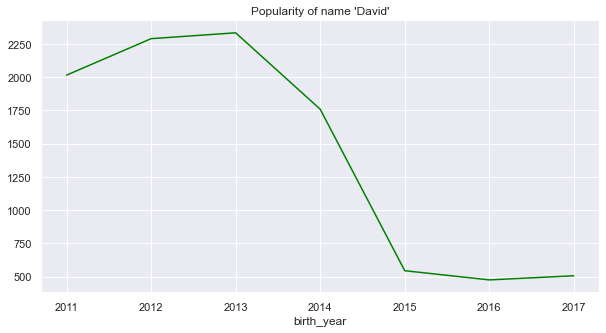

In [10]:
#1.8
filter1 = (birth.first_name == 'david')
david = birth[filter1]
david_grouped = david.groupby('birth_year').frequency.sum()
david_grouped.plot(figsize=(10,5), kind = "line", title = "Popularity of name 'David'", color="green");

David Beckhams statements about the popularity of his name have seemed to go down.  The above graph proves him right. 
The above lines of code created a visual correlation of the name david and the frequency of it through out the years. 

In [11]:
#1.9
print('There are ', birth.first_name.nunique(), 'unique names in the dataset')

There are  1832 unique names in the dataset


There seems to be 1832 unique names in the dataset.

In [12]:
#1.10
filter2 = (birth.gender == 'male')
filter3 = (birth.gender == 'female')
males = birth[filter2]
females = birth[filter3]
print('There are ' , males.first_name.nunique(), 'unique male names')
print('There are ',females.first_name.nunique(), 'unique female names') 

There are  852 unique male names
There are  1011 unique female names


1.11
The answer to 1.9 is not consistent with 1.10. If we sum up the total of names from question 1.10, it would give us 1863 unique names.  This inconsistency happened because there are unisex names that can be used for both males and females. 

In [13]:
#1.12
pd.crosstab(birth.ethnicity, birth.birth_year, values = birth.frequency,  aggfunc = 'sum', margins = True)



birth_year,2011,2012,2013,2014,2015,2016,2017,All
ethnicity,,,,,,,,
asian and paci,NaN,40085.0,NaN,NaN,NaN,NaN,NaN,40085
asian and pacific islander,32217.0,NaN,34760.0,36536.0,9584.0,9973.0,8865.0,131935
black non hisp,NaN,39426.0,NaN,NaN,NaN,NaN,NaN,39426
black non hispanic,42045.0,NaN,38548.0,37728.0,9637.0,9147.0,8699.0,145804
hispanic,96743.0,90782.0,86585.0,85529.0,22813.0,22086.0,20701.0,425239
white non hisp,NaN,103829.0,NaN,NaN,NaN,NaN,NaN,103829
white non hispanic,98824.0,NaN,102793.0,102841.0,27566.0,27534.0,27130.0,386688
All,269829.0,274122.0,262686.0,262634.0,69600.0,68740.0,65395.0,1273006


Some values have NA because there are some inconsistencies in the ethnicities.  Asian and paci is the same as asian and pacific islander.  If we take a closer look, if the two rows were overlapped, they would fill in eachothers gaps.

In [14]:
#1.13
pd.crosstab(birth.gender, birth.birth_year, values = birth.frequency, aggfunc = 'sum', margins = True)

birth_year,2011,2012,2013,2014,2015,2016,2017,All
gender,,,,,,,,
female,117700,119406,115183,116590,30592,30360,28897,558728
male,152129,154716,147503,146044,39008,38380,36498,714278
All,269829,274122,262686,262634,69600,68740,65395,1273006


## Problem 2. 
Analyzing the price of houses in a community and understand why the price varies. 


Lets read the house_prices file and analyze it for any gaps or inconsistencies before doing any analyzing!

In [15]:
houseprice = pd.read_excel('house_prices.xlsx')
houseprice

,address,price,acres,size_sqft,age,rooms,baths,garages
0,9 Sycamore Road,466.00,0.2297,2448,46,7,3.5,2
1,21 Jefferson St,364.00,0.2192,1942,51,7,2.5,1
2,38 Hitching Post Lane,429.00,0.1630,2073,29,5,3.0,2
3,4 Poppy Lane,548.40,0.4608,2707,18,8,2.5,1
4,5 Daniel Drive,405.90,0.2549,2042,46,7,1.5,1
5,15 Francis Terrace,374.10,0.2290,2089,88,7,2.0,0
6,23 Guilfoy Street,315.00,0.1808,1433,48,7,2.0,0
7,17 Carlyle Drive,749.74,0.5015,2991,7,9,2.5,1
8,8 Craft Avenue,217.70,0.2229,1008,52,5,1.0,0
9,22 Beechwood Ct.,635.70,0.1300,3202,15,8,2.5,2


In [16]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    30 non-null     object 
 1   price      30 non-null     float64
 2   acres      30 non-null     float64
 3   size_sqft  30 non-null     int64  
 4   age        30 non-null     int64  
 5   rooms      30 non-null     int64  
 6   baths      30 non-null     float64
 7   garages    30 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ KB


There are no null values in the dataframe

In [17]:
#2.1
houseprice.price.describe()

count     30.000000
mean     389.849333
std      120.388100
min      217.700000
25%      314.325000
50%      363.750000
75%      438.525000
max      749.740000
Name: price, dtype: float64

The above chart fully describes house prices in the recorded community. 

Text(0.5, 1.0, 'correlation of house price to room number')

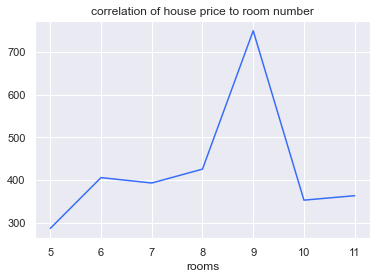

In [18]:
#2.2
houseprice.groupby('rooms').price.mean().plot(kind = 'line').set_title('correlation of house price to room number')

It looks like houses with 9 rooms are the most expensive, but then the price decreases  past the 9 room mark

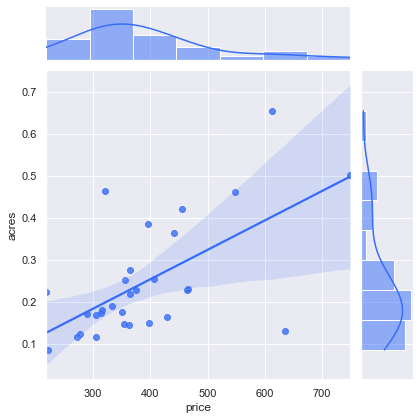

In [19]:
#2.3
sns.jointplot(data=houseprice, x ="price",y ="acres" ,kind="reg" ) 

There is a positive correlation between house price and the amount of acres 

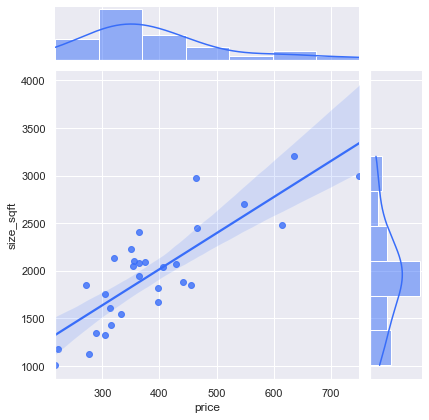

In [20]:
sns.jointplot(data=houseprice, x ="price",y ="size_sqft" ,kind="reg" ); 

There is a strong positive correlation between house price and the square footage of the house

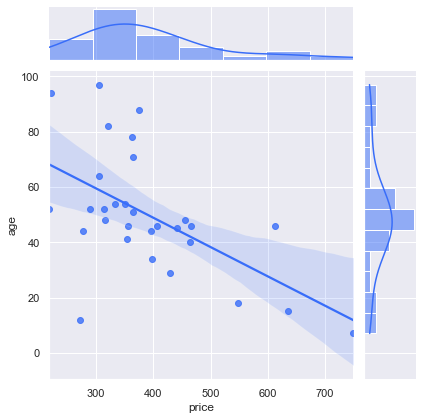

In [21]:
sns.jointplot(data=houseprice, x ="price",y ="age" ,kind="reg" ); 

There is a negative correlation between the age of the house and the price of the house.  The older the house,  the cheaper the price of the house

Text(0.5, 1.0, 'correlation of house price to room number')

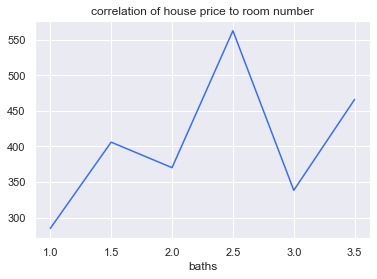

In [22]:
houseprice.groupby('baths').price.mean().plot(kind = 'line').set_title('correlation of house price to room number')

It could be seen that the most expensive house has 2.5 baths, and after that, the houses with more baths have a lower price.

2.4
The most influential attribute to house price is the square footage. The more square footage of the house, the more expensive it will be.  I did not find any findings surprising aside from the fact that more rooms in a house does not always mean more expensive.  I was able to illustrate that once a house reaches 9 rooms, the price lowers drastically.

In [23]:
import getpass
import datetime
print('\n\n\n Finished execution at' , datetime.datetime.now())
print(getpass.getuser())




 Finished execution at 2021-12-13 14:31:18.368793
katia
